<a href="https://colab.research.google.com/github/jialinli-21/Li_DSPN_S25/blob/main/Exercise17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [3]:
library(glmnet)
library(tidyverse)
library(ggplot2)



Loading required package: Matrix

Loaded glmnet 4.1-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [8]:
train_ind = sample(seq(101), 50, replace=FALSE)
trainX = x[train_ind]
trainY = y[train_ind]

testX = x[-train_ind]
testY = y[-train_ind]

trainingSet = data.frame(trainX,trainY)
testingSet = data.frame(testX,testY)


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

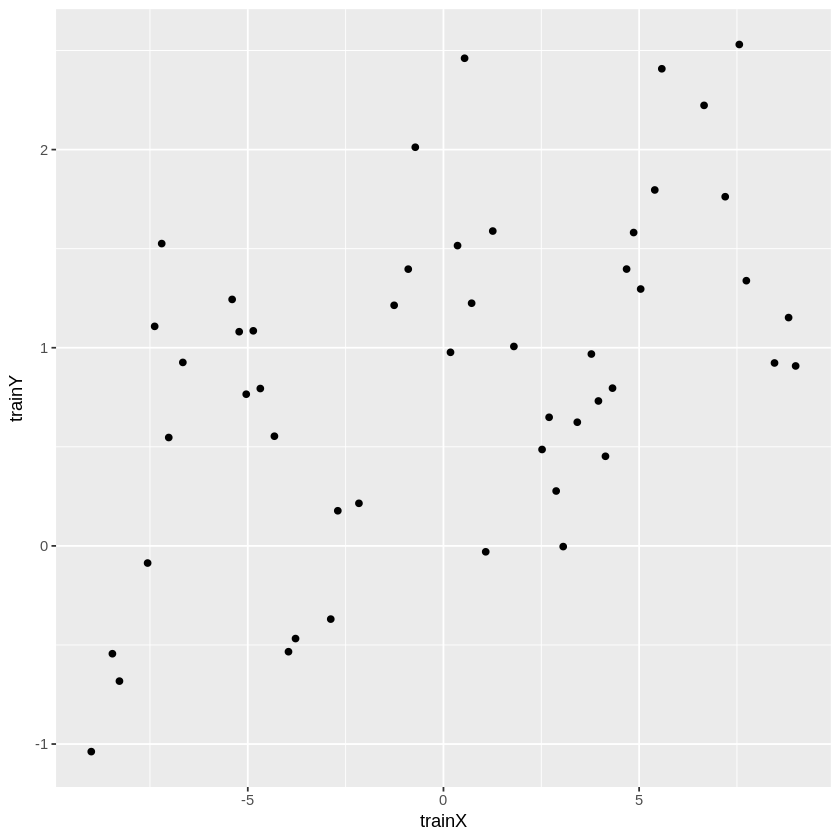

In [9]:
ggplot(trainingSet,aes(x=trainX,y=trainY)) +
  geom_point()

How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
>

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

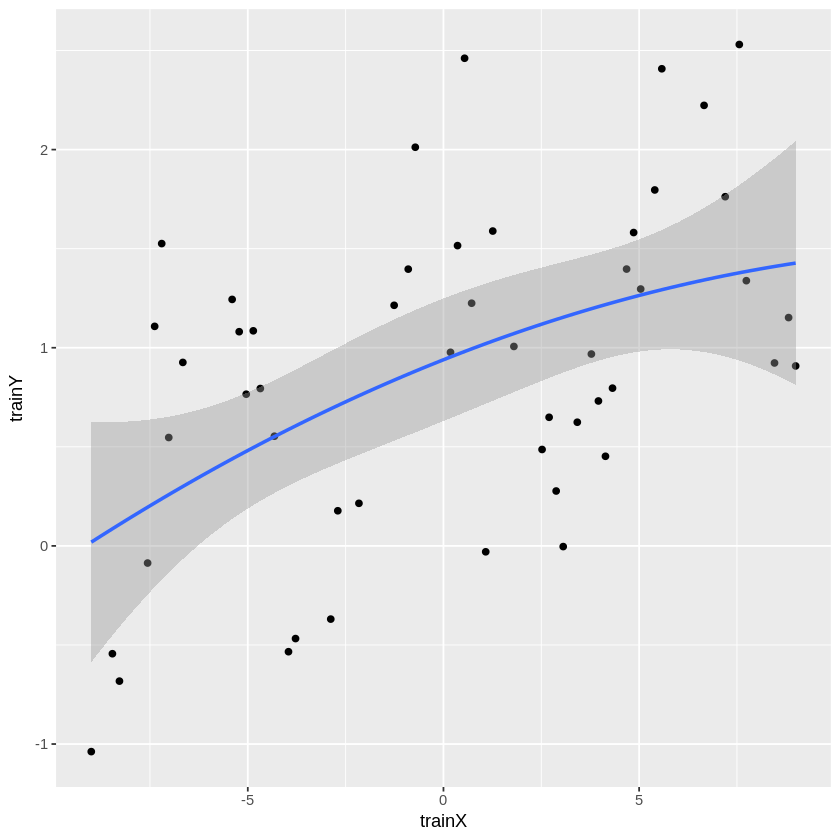

In [14]:
# help(stat_smooth)
# help(poly)
ggplot(trainingSet, aes(x = trainX, y = trainY)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2))


How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> *Write your response here*
>

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

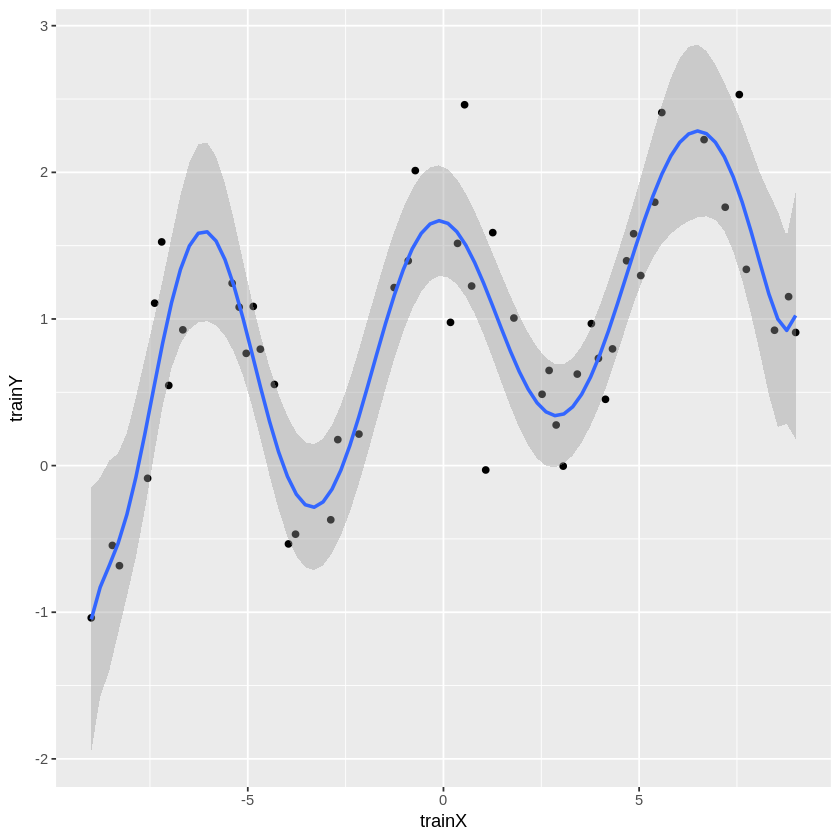

In [20]:
ggplot(trainingSet, aes(x = trainX, y = trainY)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x, 12))




> *Write your response here*
>




(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

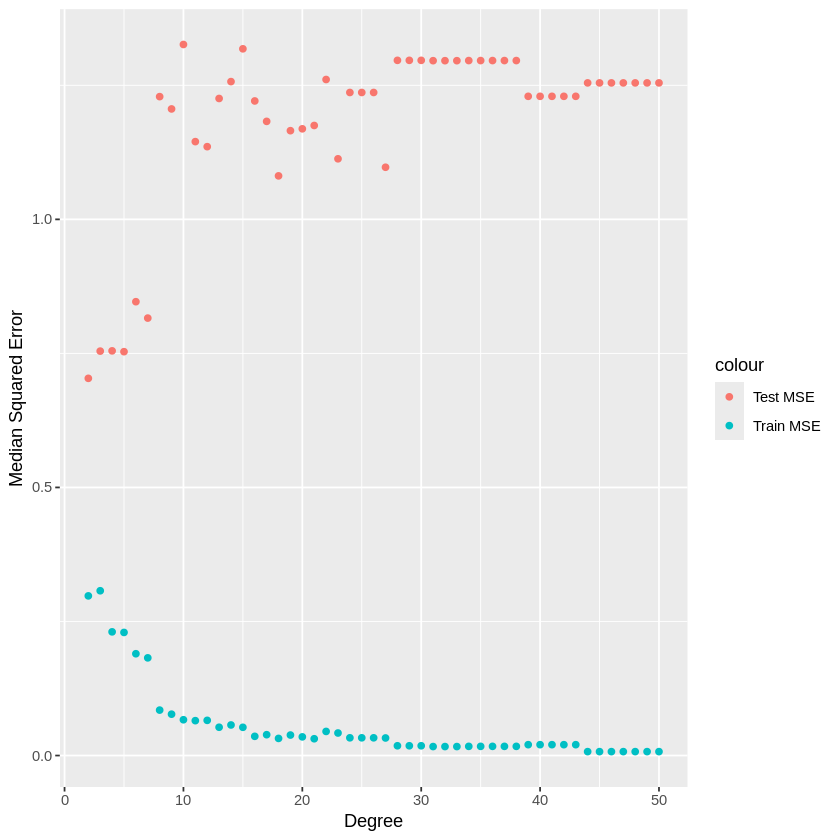

In [35]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
options(warn = -1)
for (k in degree) {
  mod <- lm(trainY ~ poly(trainX, k, raw = TRUE), data = trainingSet)
  # Predictions on training data
  train_pred <- predict(mod, newdata = trainingSet)
  train_rss[k-1] <- median((trainingSet$trainY - train_pred)^2)

  # Predictions on test data
  test_pred <- predict(mod, newdata = testingSet)
  test_rss[k-1] <- median((testingSet$testY - test_pred)^2)
}

results <- data.frame(
  degree,
  train_rss,
  test_rss
)
# Plot your results here
ggplot(results, aes(x = degree)) +
  geom_point(aes(y = train_rss, color = "Train MSE")) +
  geom_point(aes(y = test_rss, color = "Test MSE")) +
  labs(x ='Degree', y = "Median Squared Error")


What do you see as $k$ increase?

> *Write your response here*
>

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



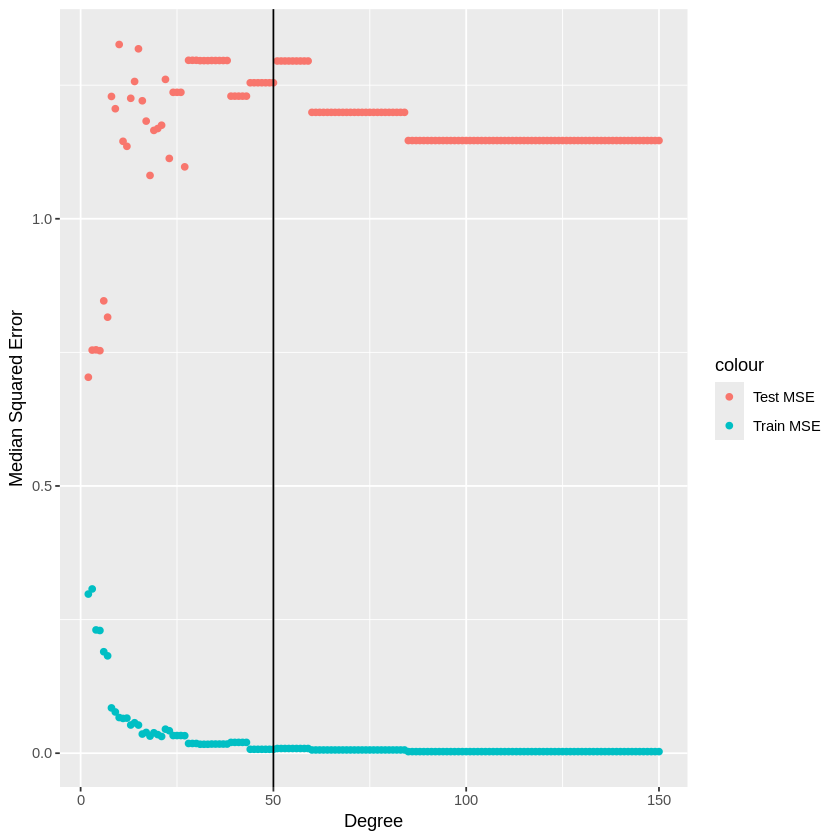

In [41]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
options(warn = -1)
for (k in degree) {
  mod <- lm(trainY ~ poly(trainX, k, raw = TRUE), data = trainingSet)
  # Predictions on training data
  train_pred <- predict(mod, newdata = trainingSet)
  train_rss[k-1] <- median((trainingSet$trainY - train_pred)^2)

  # Predictions on test data
  test_pred <- predict(mod, newdata = testingSet)
  test_rss[k-1] <- median((testingSet$testY - test_pred)^2)
}

results <- data.frame(
  degree,
  train_rss,
  test_rss
)
# Plot your results here
ggplot(results, aes(x = degree)) +
  geom_point(aes(y = train_rss, color = "Train MSE")) +
  geom_point(aes(y = test_rss, color = "Test MSE")) +
  geom_vline(xintercept = 50)+
  labs(x ='Degree', y = "Median Squared Error")




What do you see as $k$ gets larger than $n$?

> *Write your response here*
>

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

In [48]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
options(warn = -1)

for (k in degree) {
    X_train <- model.matrix(~ poly(trainX, k, raw = TRUE), data = trainingSet)[, -1]
    y_train <- trainingSet$trainY

    X_test <- model.matrix(~ poly(testX, k, raw = TRUE), data = testingSet)[, -1]
    y_test <- testingSet$testY

    ridge.mod = glmnet(X_train,y_train, alpha=0, lambda=lambda)

    test_pred <- predict(ridge.mod, lambda = lambda, newdata = testingSet)
    test_rss[k-1] <- median((testingSet$testY - test_pred)^2)

}

# Plot your results here
# WRITE YOUR CODE HERE


ERROR: Error in predict.glmnet(ridge.mod, lambda = lambda, newdata = testingSet): You need to supply a value for 'newx'


What happens now when $k$ gets larger than $n$?

> *Write your response here*
>

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here*
>

---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here*
>

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Letian Huang*